#Trabajo Parcial - Inteligencia Artificial CC62

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Análisis EDA

### 1. Recolección de los datos

In [2]:
!gdown 17C78KdpxAk-s2zE8VaoaAw5E07O6uGjm

Downloading...
From: https://drive.google.com/uc?id=17C78KdpxAk-s2zE8VaoaAw5E07O6uGjm
To: /content/tiktok_dataset.csv
100% 128k/128k [00:00<00:00, 90.3MB/s]


In [3]:
df=pd.read_csv('tiktok_dataset.csv', header=0)

### 2. Previsualización de los datos

In [4]:
df.head()

,text,diggCount,replyCommentTotal,createTimeISO,uniqueId,videoWebUrl,uid,cid
0,😏😏,0,0.0,2023-02-18T21:00:37.000Z,jieryeson27,https://www.tiktok.com/@pedro.ceroyalas/video/...,7.075861e+18,7.201604e+18
1,@effy.00 😂,0,0.0,2022-12-13T18:06:52.000Z,otakugirl2606,https://www.tiktok.com/@pedro.ceroyalas/video/...,2.167330e+17,7.176696e+18
2,"jingle bell, jingle bell, jingle bell rock… 👯‍...",2,0.0,2022-12-08T08:26:40.000Z,andrea.aguirrec,https://www.tiktok.com/@pedro.ceroyalas/video/...,1.102614e+17,7.174691e+18
3,@betterwayso15 tus friends? 😂,0,1.0,2022-12-04T14:09:30.000Z,kassinatural.96,https://www.tiktok.com/@pedro.ceroyalas/video/...,6.803511e+18,7.173295e+18
4,super !,1,0.0,2022-12-03T20:48:49.000Z,shery_fs,https://www.tiktok.com/@pedro.ceroyalas/video/...,6.728565e+18,7.173027e+18


Cambiamos el formato de la columna *createTimeISO*  para que tenga un formato de tiempo.

In [5]:
df['createTimeISO']=pd.to_datetime(df['createTimeISO'])

In [6]:
df.head()

,text,diggCount,replyCommentTotal,createTimeISO,uniqueId,videoWebUrl,uid,cid
0,😏😏,0,0.0,2023-02-18 21:00:37+00:00,jieryeson27,https://www.tiktok.com/@pedro.ceroyalas/video/...,7.075861e+18,7.201604e+18
1,@effy.00 😂,0,0.0,2022-12-13 18:06:52+00:00,otakugirl2606,https://www.tiktok.com/@pedro.ceroyalas/video/...,2.167330e+17,7.176696e+18
2,"jingle bell, jingle bell, jingle bell rock… 👯‍...",2,0.0,2022-12-08 08:26:40+00:00,andrea.aguirrec,https://www.tiktok.com/@pedro.ceroyalas/video/...,1.102614e+17,7.174691e+18
3,@betterwayso15 tus friends? 😂,0,1.0,2022-12-04 14:09:30+00:00,kassinatural.96,https://www.tiktok.com/@pedro.ceroyalas/video/...,6.803511e+18,7.173295e+18
4,super !,1,0.0,2022-12-03 20:48:49+00:00,shery_fs,https://www.tiktok.com/@pedro.ceroyalas/video/...,6.728565e+18,7.173027e+18


In [7]:
copy=df.copy()
copy.sort_values(by='createTimeISO', inplace=True)

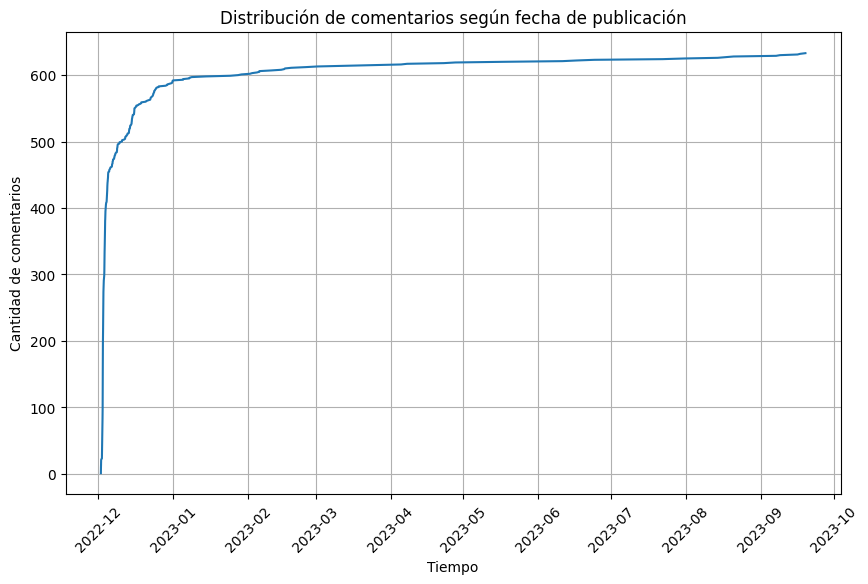

In [8]:
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura según tus preferencias

# Utiliza la columna de tiempo en el eje x y otra columna (por ejemplo, 'valor') en el eje y
copy['conteo_comentarios'] = range(1, len(copy) + 1)

plt.plot( copy['createTimeISO'], copy['conteo_comentarios'])

# Personaliza las etiquetas de los ejes y el título del gráfico
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de comentarios')
plt.title('Distribución de comentarios según fecha de publicación')

# Rotación de las etiquetas del eje x para mejorar la legibilidad si es necesario
plt.xticks(rotation=45)

# Muestra el gráfico
plt.grid(True)  # Activa las líneas de la cuadrícula si lo deseas
plt.show()


### 3. Normalización de los datos

Solo guardamos los datos que se utilizarán para el entrenamiento. La parte de equiquetado se agregará en la siguiente entrega.

In [9]:
df=df[['text']]

Utilizaremos una lista de listas para representar los tokens para nuestro.

In [10]:
df_list=list()
for s in df['text']:
    df_list.append(s)

Isntalamos Spacy para realizar la normalización de tokens

In [ ]:
!pip install spacy
!python -m spacy download es

Importamos la librería de spacy y cargamos un modelo de lenguaje español con el que se trabajará

In [12]:
import spacy
nlp = spacy.load('es_core_news_sm')

Creamos las siguientes funciones para tokenizar, remover palabras de parada, lematizar, y filtro de palabras, y finalmente luego creamos una función de normalización que aplique las 4 funciones

In [13]:
def tokenization(docs_list):
    # TODO
    n = len(docs_list)
    lista_listas = []
    for i in range(n):
      text = docs_list[i]
      doc = nlp(text)
      lista_listas.append([word.text.strip() and word.text.lower() for word in doc if len(word.text.strip()) > 0])

    return lista_listas

In [14]:
def remove_words(docs):
  # TODO
  n = len(docs)
  lista_listas = []
  for i in range(n):
      text = docs[i]
      #Obtenemos cada sublista del corpus previamente tokenizado
      doc = spacy.tokens.doc.Doc(nlp.vocab, words=text)
      lista_listas.append([word.text for word in doc if not word.is_punct and not word.is_stop and not word.text.startswith("@")])
  lista_listas=[token for token in lista_listas if token]
  return lista_listas

In [15]:
def lematization(docs):
    # TODO
    n = len(docs)

    lista_listas = []
    for i in range(n):
      text = docs[i]
      doc = nlp(" ".join(text))
      lista_listas.append([word.lemma_ for word in doc])
    return lista_listas

In [19]:
def filter_words(docs):
    n = len(docs)
    pos_validos = {"PROPN", "NOUN", "VERB", "ADJ", "ADV"}

    lista_listas = []

    for i in range(n):
        text = docs[i]
        doc = spacy.tokens.doc.Doc(nlp.vocab, words=text)
        doc = nlp(doc)
        lista_listas.append([word.text for word in doc if word.pos_ in pos_validos])

        #lista_listas.append([word.pos_ for word in doc])
    return lista_listas

In [20]:
def normalization(docs_list):
    corpus = tokenization(docs_list)
    corpus = remove_words(corpus)
    corpus = lematization(corpus)
    corpus = filter_words(corpus)
    return corpus



In [21]:
df_list=normalization(df_list)
df_list

[['😏', '😏'],
 ['😂'],
 ['jinglir',
  'bell',
  'jingle',
  'bell',
  'jingle',
  'bell',
  'rock',
  '👯',
  '\u200d',
  '👯',
  '\u200d',
  '️'],
 ['friends', '😂'],
 ['super'],
 ['slayyyy'],
 ['amazing', 'obviiii', '🥰'],
 ['🥺'],
 ['coordinación', '<33'],
 ['felicidad', 'fácil', 'lidiar', 'examen', 'trabajo', 'grupal', 'coreo'],
 ['asombra', 'tener', 'ropa', 'cabello', 'tbm', 'jajjo'],
 ['risa', 'criticar', 'mortal'],
 ['lindasaaaaasssss'],
 ['hermosa',
  '🥰',
  'tiempo',
  'armar',
  'coreo',
  'clás',
  'trabajo',
  'excelente',
  'chica'],
 ['academia', 'baile', 'bailar', 'lindo', '🥰', '🥰', 'súper', 'actitud'],
 ['escuela',
  'baile',
  'hermosa',
  'vibra',
  'super',
  'lindo',
  'excelente',
  'lugar',
  'aprender',
  'bailaaar'],
 ['buscador', 'jakajakjaa'],
 ['lugar', 'aprender', 'bailar', '😍'],
 ['corear', 'dance', 'increíble', 'coreo', '😁'],
 ['subir', 'coreo', 'querer'],
 ['jajajajar', 'bby', 'querer', 'bailar', '🥲'],
 ['pq', 'jajaja', 'quieres', 'hablar', 'gol', 'acabar'],
 ['

Total de tokens

In [22]:
#total de tokens_por_documento (donde el corpus es una lista de listas)
#Retorna una lista de totales de tokens por documento
def tokens_por_corpus(corpus):
  tot_tokens_doc = []
  for i in range(len(corpus)):
    tot_tokens_doc.append(len(corpus[i]))
  return tot_tokens_doc

In [23]:
print("Cantidad de documentos: ", len(tokens_por_corpus(df_list)))
print("Total de tokens en todo el corpus: ", sum((tokens_por_corpus(df_list))))

Cantidad de documentos:  600
Total de tokens en todo el corpus:  2053
